In [21]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from jupyterthemes import jtplot
jtplot.reset()
np.random.seed(42)

# Generate data with a slightly ambiguous linear decision boundary 

In [22]:
#...........................Data generation scheme............................
#..................Normal distribution along desicion boundary................
#.................Flipped Beta distribution along perpendicular...............
#.............................................................................
#.............................................................................
#.....................................^.P..ooooo..............................
#.....................................|.|.......ooooooooooo...................
#.....................................|.|..................oooo...............
#.....................................|.|.............ooooo...................
#.......ooo...........................l.|.........oooo........................
#...oooo...oooo.......................|.|......ooo............................
#ooo...........ooooo..................|.^....oo...............................
#...........^.......ooooooo...........|.|n_proj...............................
#...........d..............ooooooooo..v.|..o.ooooooooooooo...desicion boundary
#========.=====>========================.=====================================
#........O..............................Q..o..................................
#........<--------------t--------------->..o..................................
#.......................................|..o..................................
#.......................................|..o..................................

# set seed
np.random.seed(42)

# Set num instances
m = 1000
# Set distribution Range
R = 20
# Set classifier ambiguity, higher values dilutes the decision boundary (max 1)
a = 0.73

# preset y randomly
y_col  = np.random.randint(0, 2, (m, 1))
y = y_col.ravel()

# Choose values of w1, w2 and b
w_actual = np.array([[16],
                     [-29]])
b_actual = np.full((m, 1), 6)

# normal to the separation plane projected onto the xy plane
n_proj = w_actual.ravel()
n_proj = n_proj / np.linalg.norm(np.append(n_proj, [1]))

# direction vector along the intsection of separation plane and z = 0
d = np.array([-w_actual[1,0], w_actual[0,0]])
d = d / np.linalg.norm(d)

# directional length along d
t = np.random.normal(loc = 0, scale = 5.0, size = (m, 1))

# Point on z = 0
x_center = (-b_actual) / (2 * w_actual[0,0])
y_center = (-b_actual) / (2 * w_actual[1,0])

# length perpendicular to d, R - beta to flip the beta dist. to center at R
scaling_factor = R / a
y_norm = np.where(y_col > 0, 1, -1)
l = y_norm * (R - scaling_factor * np.random.beta(a = 2, b = 5, size = (m, 1)))

# x = t*d + l*n_proj
X = np.c_[x_center + t * d[0] + l * n_proj[0],
          y_center + t * d[1] + l * n_proj[1]]

# A function to plot the data and a separation plane

In [23]:
from mpl_toolkits import mplot3d

def plot_separation_plane(w1, w2, b, title = '', show_desicion_plane = True, show_lanes = True):
    # syntax for 3-D projection
    fig = plt.figure(figsize = (20, 20))
    ax = plt.axes(projection ='3d')

    # lets put the data on z = 0
    z = np.zeros(m)
    ax.set_zlim(-50, 50)

    # plot data points 
    ax.plot(X[:, 0][y == 1], X[:, 1][y == 1], z[y == 1], 'b^', label = 'positive', alpha=0.5)
    ax.plot(X[:, 0][y == 0], X[:, 1][y == 0], z[y == 0], 'gs', label = 'negetive', alpha=0.5)

    # create data surface
    xx, yy = np.meshgrid(range(-25, 26, 5), range(-25, 26, 5))
    ax.plot_surface(xx, yy, np.zeros((11, 11)), alpha=0.2, color = 'y')

    if show_desicion_plane:
        # decision surface
        zz = w1 * xx + w2 * yy + b
        ax.plot_wireframe(xx, yy, zz)

        # decision line
        x_line = np.linspace(-25, 25, 100)
        y_line = (-w1 * x_line - b) / w2
        z_line = np.zeros(100)
        ax.plot(x_line, y_line, z_line, 'r-')

        # show lanes
        if show_lanes:
            y1_line = (-w1 * x_line - (b - 10)) / w2
            y2_line = (-w1 * x_line - (b + 10)) / w2
            ax.plot(x_line, y1_line, z_line, 'k--')
            ax.plot(x_line, y2_line, z_line, 'k--')

    # rotate for nice plot
    ax.view_init(20,200)

    # set labels
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

    # legend and title
    plt.legend()
    plt.title(title)
    
    return ax

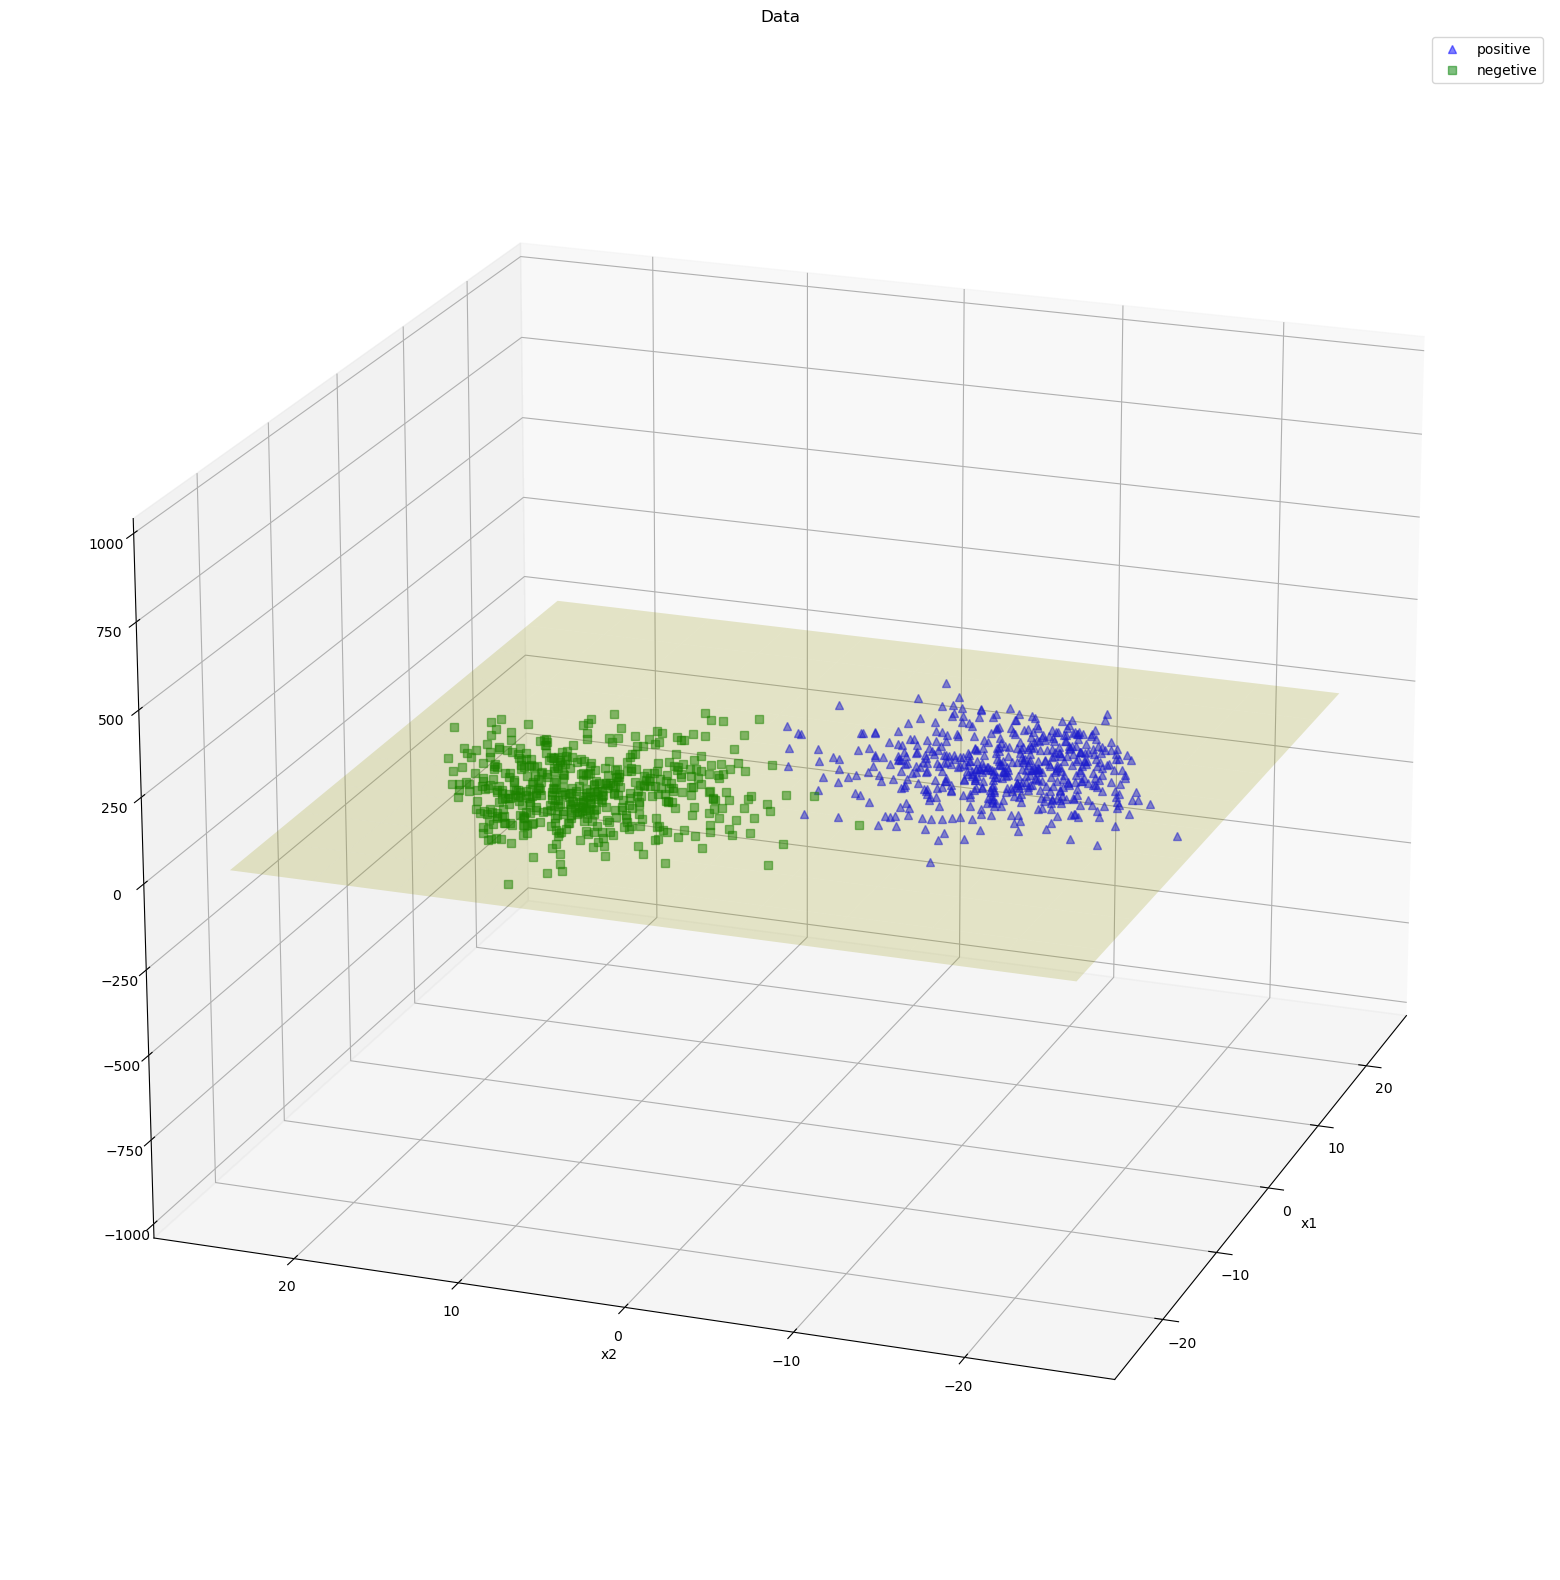

In [24]:
ax = plot_separation_plane(w_actual[0,0], w_actual[1,0], b_actual[0,0],
                           'Data', False, False)
ax.set_zlim(-1000, 1000)
plt.show()

# Linear SVM

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

[[ 0.78729341 -1.87318647]] [0.0304377]


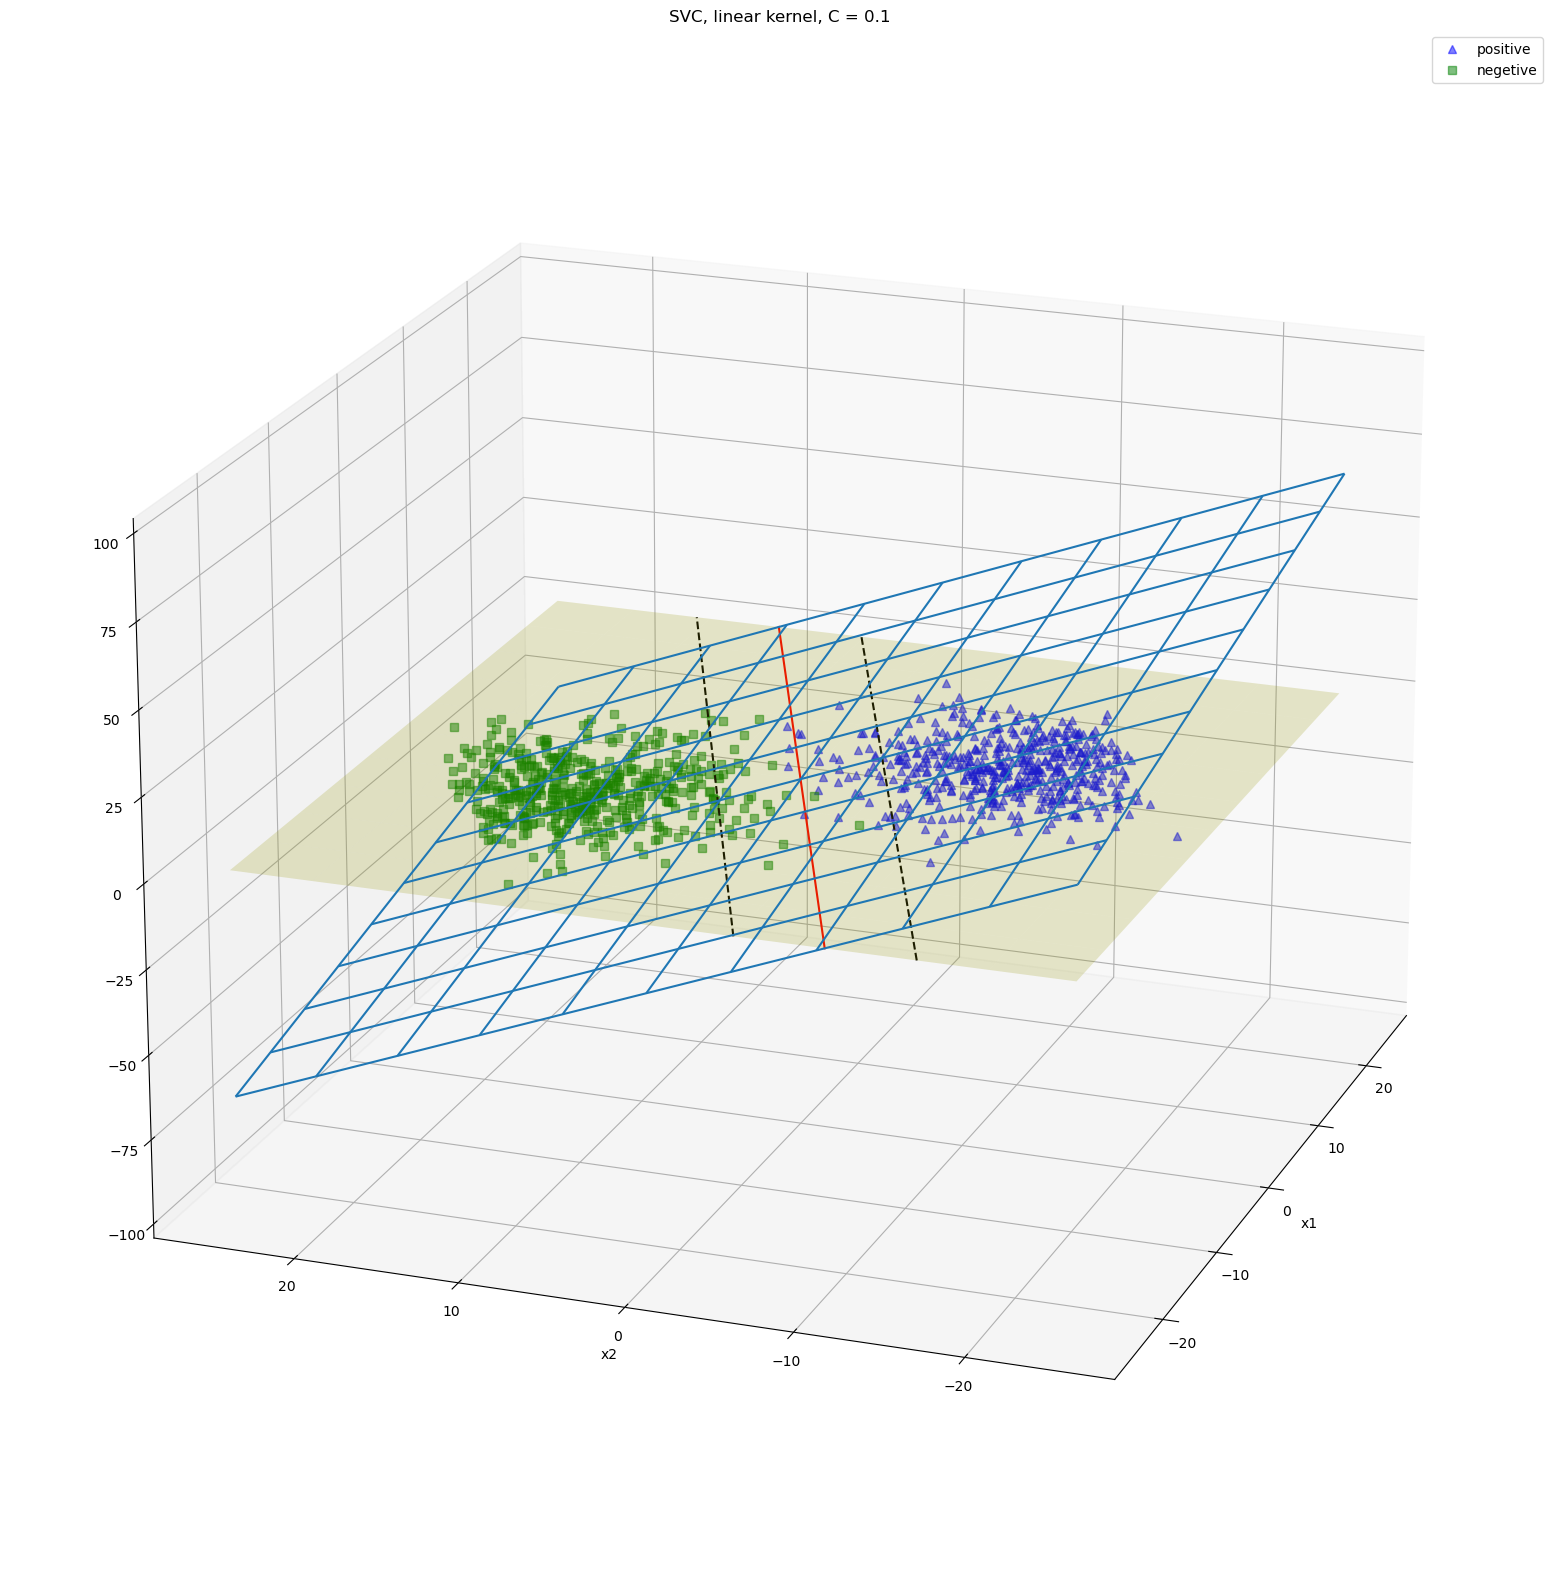

[[ 3.45746673 -8.78223127]] [0.18253042]


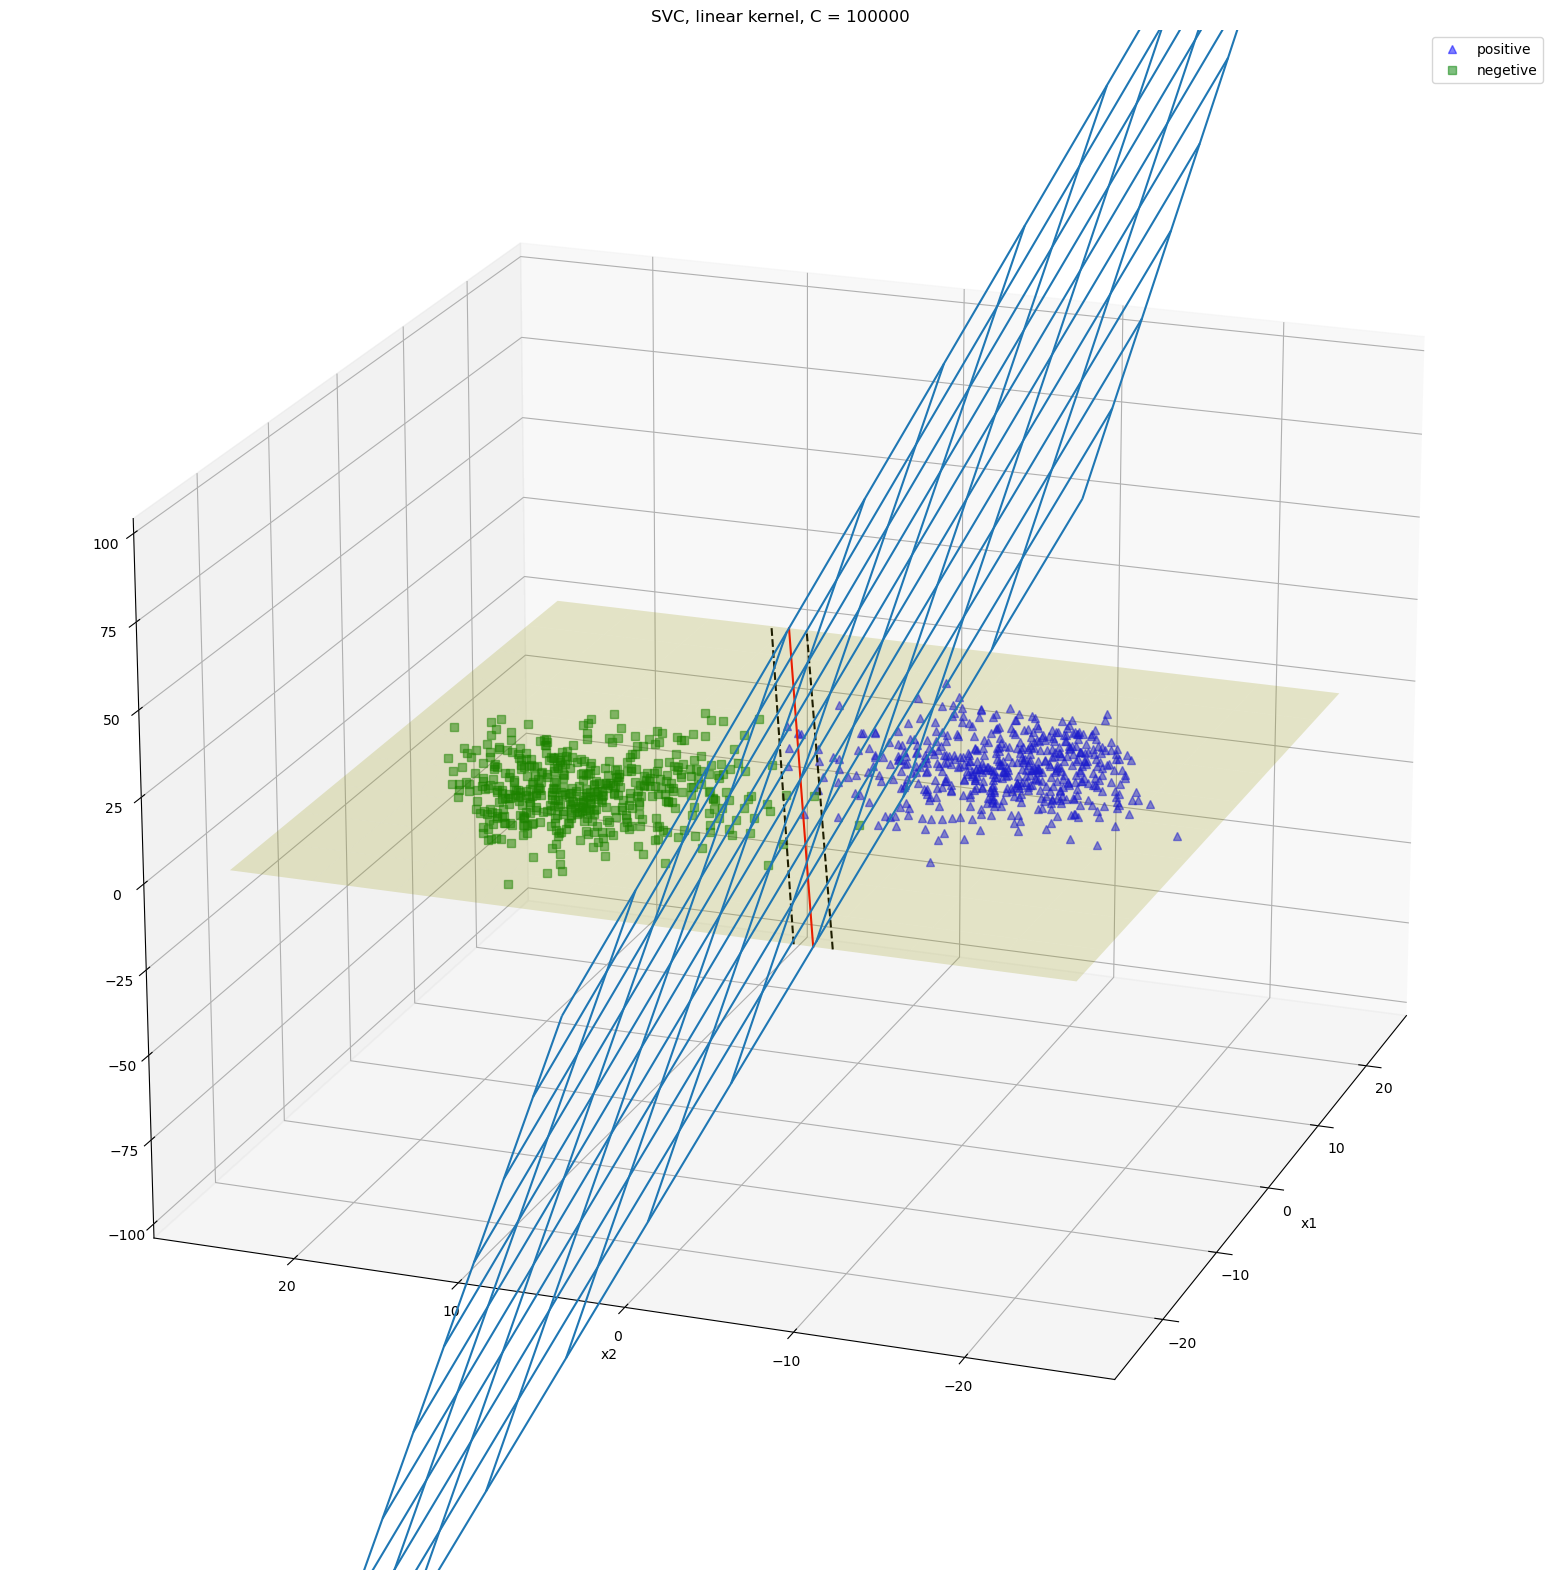

In [26]:
from sklearn.svm import SVC

svm_ker_lin_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel = 'linear', C = 0.1))
])

svm_ker_lin_clf.fit(X, y)

print(svm_ker_lin_clf['classifier'].coef_, svm_ker_lin_clf['classifier'].intercept_)

ax = plot_separation_plane(svm_ker_lin_clf['classifier'].coef_[0,0], 
                           svm_ker_lin_clf['classifier'].coef_[0,1], 
                           svm_ker_lin_clf['classifier'].intercept_[0], 
                           'SVC, linear kernel, C = 0.1')
ax.set_zlim(-100, 100)
plt.show()

svm_ker_lin_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel = 'linear', C = 100000))
])

svm_ker_lin_clf.fit(X, y)

print(svm_ker_lin_clf['classifier'].coef_, svm_ker_lin_clf['classifier'].intercept_)

ax = plot_separation_plane(svm_ker_lin_clf['classifier'].coef_[0,0], 
                           svm_ker_lin_clf['classifier'].coef_[0,1], 
                           svm_ker_lin_clf['classifier'].intercept_[0], 
                           'SVC, linear kernel, C = 100000')
ax.set_zlim(-100, 100)
plt.show()

[[ 0.79185755 -1.88409626]] [0.02478376]


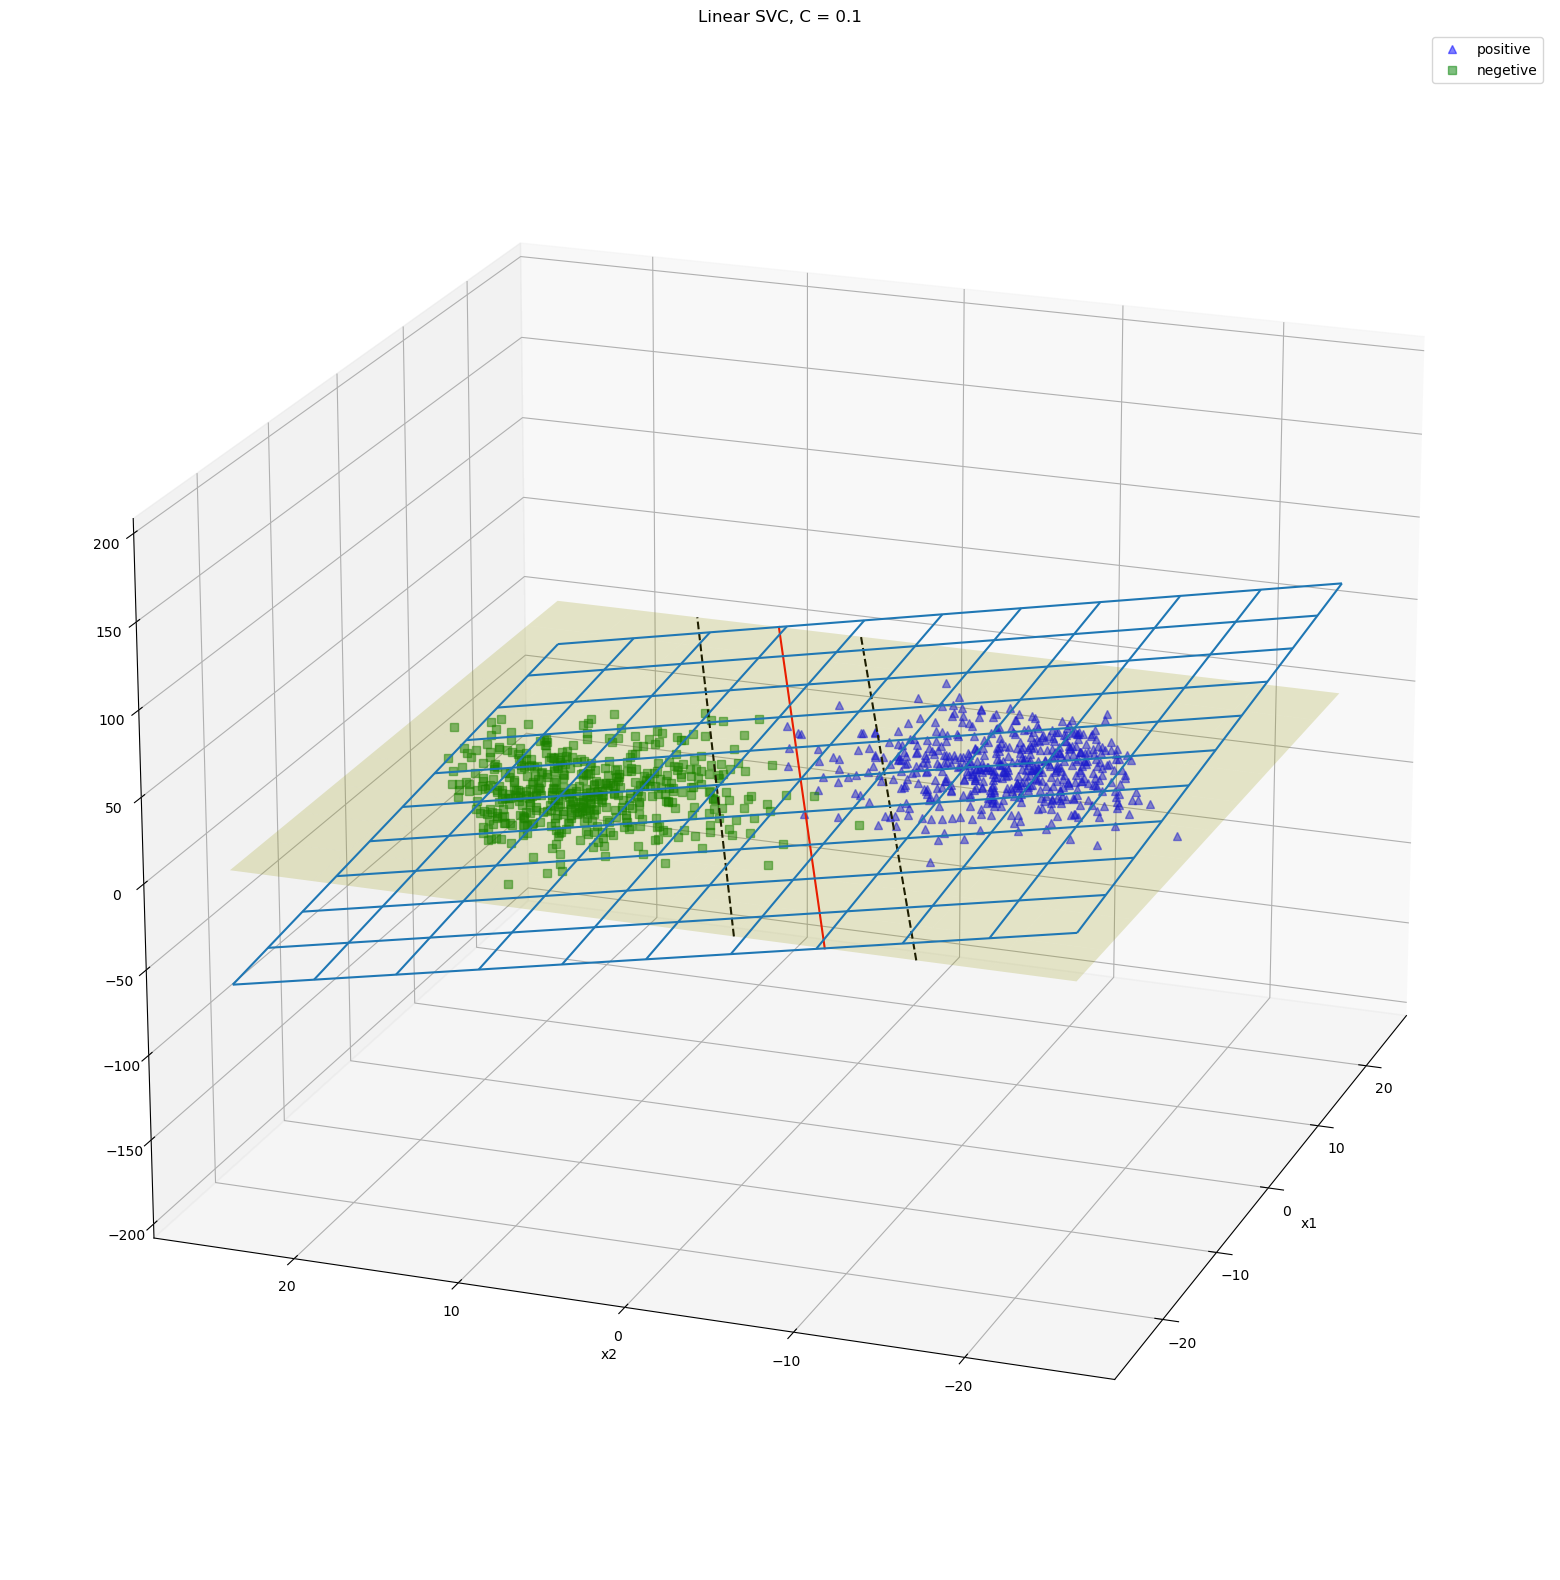

[[ 3.45257054 -8.77612402]] [0.18034721]


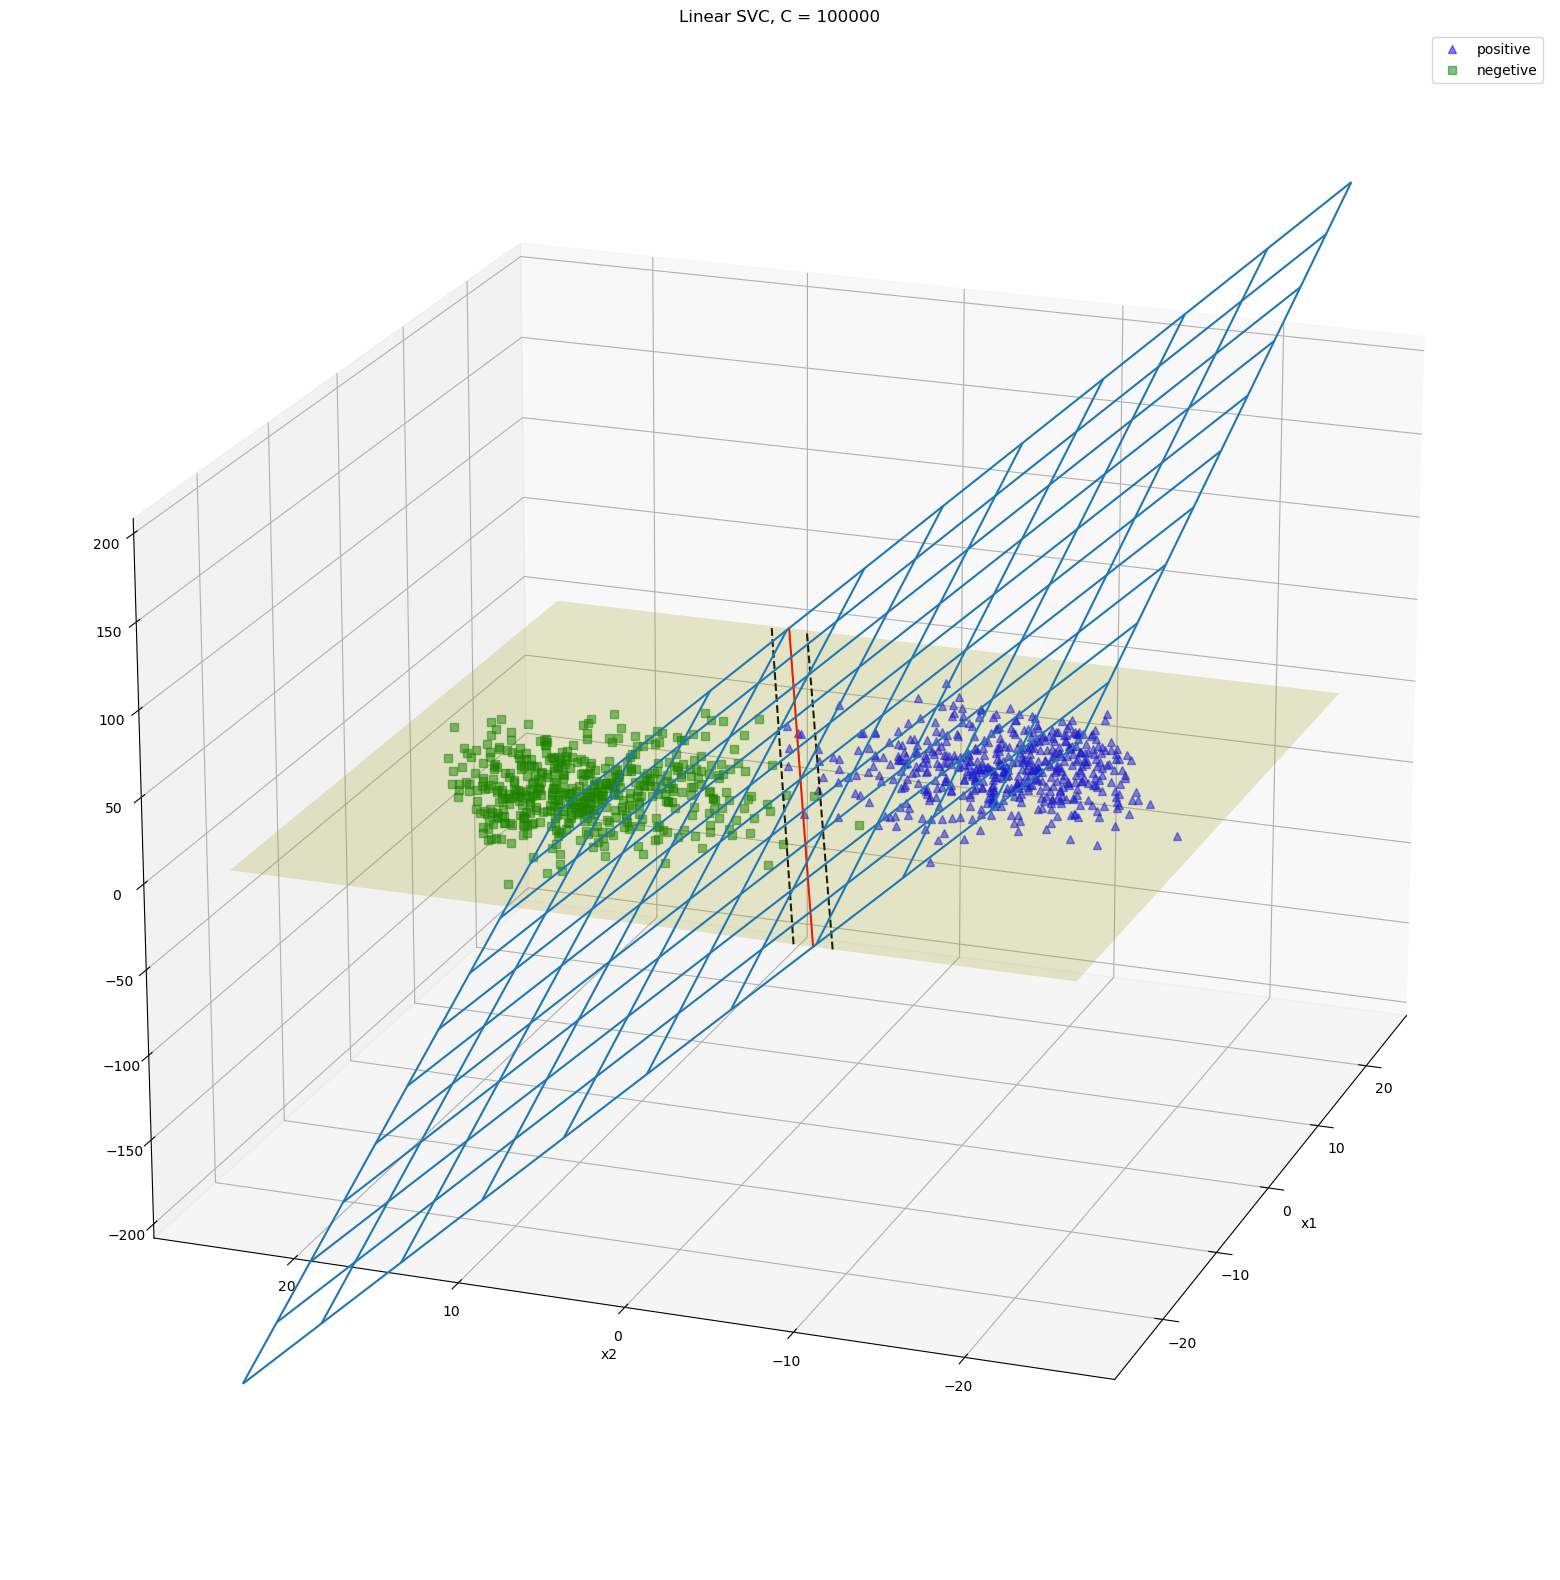

In [27]:
from sklearn.svm import LinearSVC

svm_lin_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LinearSVC(C = 0.1, loss = 'hinge'))
])

svm_lin_clf.fit(X, y)

print(svm_lin_clf['classifier'].coef_, svm_lin_clf['classifier'].intercept_)

ax = plot_separation_plane(svm_lin_clf['classifier'].coef_[0,0], 
                           svm_lin_clf['classifier'].coef_[0,1], 
                           svm_lin_clf['classifier'].intercept_[0], 
                           'Linear SVC, C = 0.1')
ax.set_zlim(-200, 200)
plt.show()

svm_lin_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LinearSVC(C = 100000, loss = 'hinge', max_iter = 1000000))
])

svm_lin_clf.fit(X, y)

print(svm_lin_clf['classifier'].coef_, svm_lin_clf['classifier'].intercept_)

ax = plot_separation_plane(svm_lin_clf['classifier'].coef_[0,0], 
                           svm_lin_clf['classifier'].coef_[0,1], 
                           svm_lin_clf['classifier'].intercept_[0], 
                           'Linear SVC, C = 100000')
ax.set_zlim(-200, 200)
plt.show()

# Function to plot non linear classifiers

In [28]:
jtplot.style()

In [29]:
from matplotlib.colors import ListedColormap
from matplotlib import cm

def plot_contour(clf):
    fig = plt.figure(figsize = (15, 10))
    ax = plt.axes()
    cmap = custom_cmap = cm.get_cmap('viridis', 10)
        
    # plot data points 
    ax.plot(X[:, 0][y == 1], X[:, 1][y == 1], '^', color = 'green', label = 'positive')
    ax.plot(X[:, 0][y == 0], X[:, 1][y == 0], 's', color = 'blue', label = 'negetive')
    
    x_grid = np.linspace(-25, 25, 100)
    y_grid = np.linspace(-25, 25, 100)

    x1, x2 = np.meshgrid(x_grid, y_grid)  
    x_flat = np.c_[x1.ravel(), x2.ravel()]
    
    y_pred = clf.predict(x_flat).reshape(x1.shape)
    y_decision = clf.decision_function(x_flat).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, cmap=cmap, alpha=0.4)
    plt.contourf(x1, x2, y_decision, cmap=cmap, alpha=0.3)
    
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    
    plt.legend()

# Polynomial Classifier

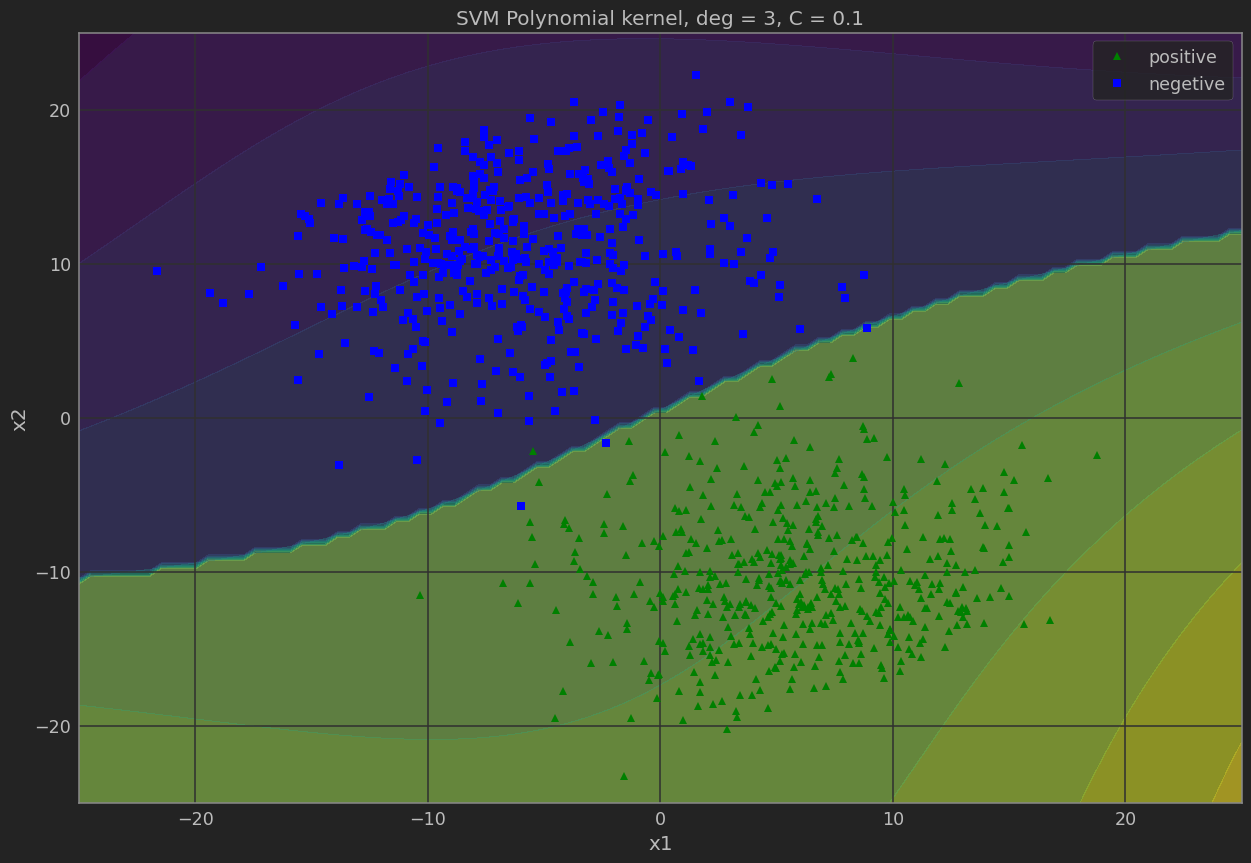

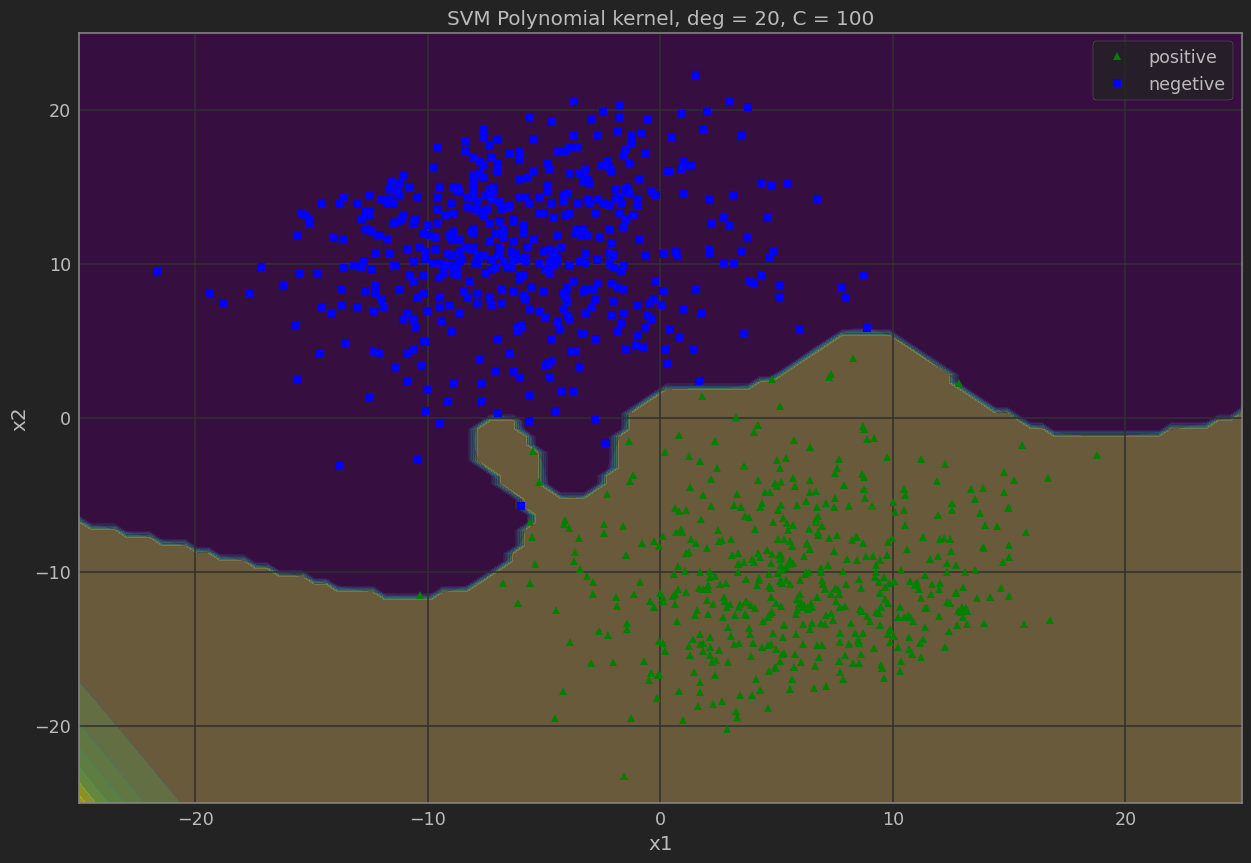

In [30]:
from sklearn.svm import SVC

svm_poly_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel = 'poly', degree = 3, coef0 = 1, C = 1))
])

svm_poly_clf.fit(X, y)

plot_contour(svm_poly_clf)
plt.title('SVM Polynomial kernel, deg = 3, C = 0.1')
plt.show()

svm_poly_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel = 'poly', degree = 20, coef0 = 1, C = 100))
])

svm_poly_clf.fit(X, y)

plot_contour(svm_poly_clf)
plt.title('SVM Polynomial kernel, deg = 20, C = 100')
plt.show()

# Gaussian RBF Classifier

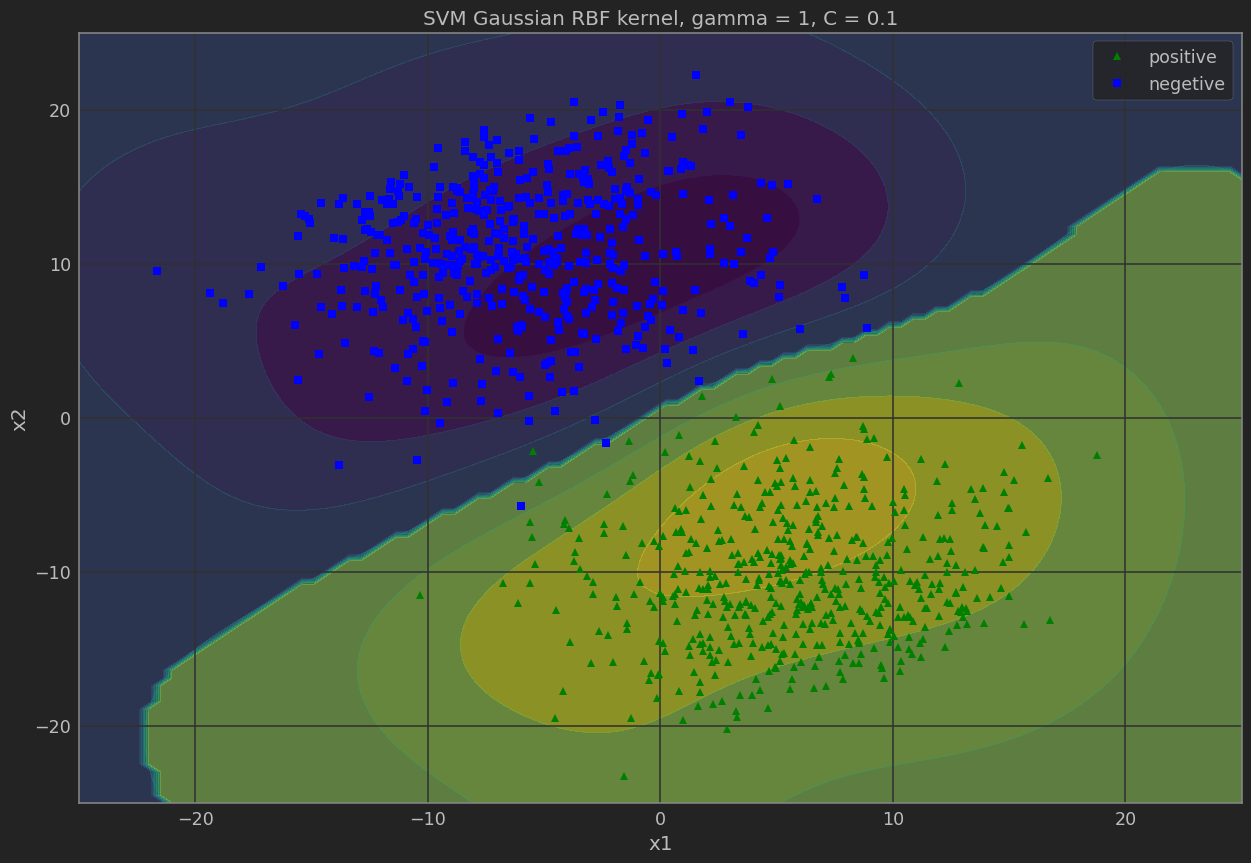

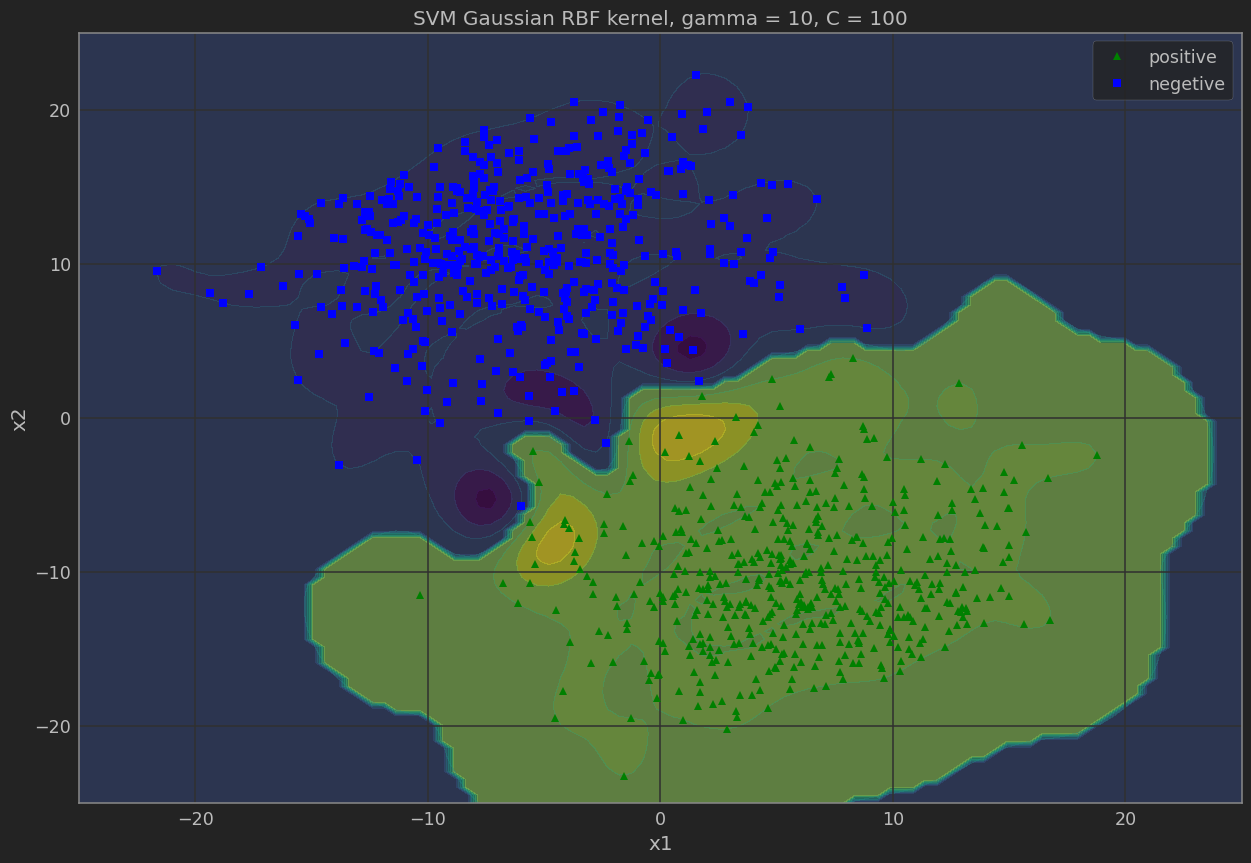

In [31]:
svm_rbf_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel = 'rbf', gamma = 1, C = 1))
])

svm_rbf_clf.fit(X, y)

plot_contour(svm_rbf_clf)
plt.title('SVM Gaussian RBF kernel, gamma = 1, C = 0.1')
plt.show()

svm_rbf_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel = 'rbf', gamma = 10, C = 100))
])

svm_rbf_clf.fit(X, y)

plot_contour(svm_rbf_clf)
plt.title('SVM Gaussian RBF kernel, gamma = 10, C = 100')
plt.show()